In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from pandas.tools.plotting import table

In [2]:
#import data files into dataframes
canada = pd.read_csv('CA.csv')
france = pd.read_csv('FR.csv')
britain = pd.read_csv('GB.csv')
us = pd.read_csv('US.csv')

In [3]:
datadf = pd.concat([canada,us,france,britain], axis=0)
datadf

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,description,Country
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10.0,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579.0,787425.0,43420.0,125882.0,Eminem's new track Walk on Water ft. Beyoncé i...,CA
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23.0,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651.0,127794.0,1688.0,13030.0,STill got a lot of packages. Probably will las...,CA
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23.0,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434.0,146035.0,5339.0,8181.0,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,CA
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24.0,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828.0,132239.0,1989.0,17518.0,I know it's been a while since we did this sho...,CA
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10.0,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622.0,1634130.0,21082.0,85067.0,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...,CA
5,0yIWz1XEeyc,17.14.11,Jake Paul Says Alissa Violet CHEATED with LOGA...,DramaAlert,25.0,2017-11-13T07:37:51.000Z,"#DramaAlert|""Drama""|""Alert""|""DramaAlert""|""keem...",1309699.0,103755.0,4613.0,12143.0,► Follow for News! - https://twitter.com/KEEMS...,CA
6,_uM5kFfkhB8,17.14.11,Vanoss Superhero School - New Students,VanossGaming,23.0,2017-11-12T23:52:13.000Z,"Funny Moments|""Montage video games""|""gaming""|""...",2987945.0,187464.0,9850.0,26629.0,Vanoss Merch Shop: https://vanoss.3blackdot.co...,CA
7,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22.0,2017-11-13T17:13:01.000Z,SHANtell martin,748374.0,57534.0,2967.0,15959.0,SHANTELL'S CHANNEL - https://www.youtube.com/s...,CA
8,JzCsM1vtn78,17.14.11,THE LOGANG MADE HISTORY. LOL. AGAIN.,Logan Paul Vlogs,24.0,2017-11-12T20:19:24.000Z,"logan paul vlog|""logan paul""|""logan""|""paul""|""o...",4477587.0,292837.0,4123.0,36391.0,Join the movement. Be a Maverick ► https://Sho...,CA
9,43sm-QwLcx4,17.14.11,Finally Sheldon is winning an argument about t...,Sheikh Musa,22.0,2017-11-10T14:10:46.000Z,"God|""Sheldon Cooper""|""Young Sheldon""",505161.0,4135.0,976.0,1484.0,Sheldon is roasting pastor of the church\nyoun...,CA


In [4]:
datadf = datadf.rename(columns={'category_id':'Category ID', 'channel_title':'Channel Title','comment_count':'Comment Count','video_id':'Video ID','trending_date':'Date Trending','title':'Title','channel_title':'Channel Title','publish_time':'Time Published','views':'Num Views','likes':'Num Likes','dislikes':'Num Dislikes','tags':'Tags','description':'Description'})
#datadf.to_csv('TotalData.csv')
#datadf.head()

In [5]:
category_dict = {1:'Film & Animation',
2:'Autos & Vehicles',
10:'Music', 
15:'Pets & Animals',
17:'Sports',
18:'Short Movies',
19:'Travel & Events',
20:'Gaming',
21:'Videoblogging',
22:'People & Blogs',
23:'Comedy',
24:'Entertainment',
25:'News & Politics',
26:'Howto & Style',
27:'Education',
28:'Science & Technology',
29:'Nonprofits & Activism',
30:'Movies',
31:'Anime/Animation',
32:'Action/Adventure',
33:'Classics',
34:'Comedy',
35:'Documentary',
36:'Drama',
37:'Family',
38:'Foreign',
39:'Horror',
40:'Sci-Fi/Fantasy',
41:'Thriller',
42:'Shorts',
43:'Shows',
44:'Trailers'}

In [6]:
categoryList = datadf['Category ID']
categoryStr = []
name = ""

for idx,each in enumerate(categoryList):
    if math.isnan(each):
        each = 0
        categoryStr.append("N/A")
        continue
    converted = int(each)
    name = category_dict[converted]
    categoryStr.append(name)

datadf["Category Name"] = categoryStr
datadf = datadf.drop(columns=['Category ID'])
#datadf

[40132812168.0, 20604388195.0, 7284156721.0]
['Music', 'Entertainment', 'Film & Animation']
[[13667832867.0, 13179472576.0, 3708438785.0], [5026447522.0, 3779500229.0, 1989962151.0], [40132812168.0, 20604388195.0, 7284156721.0], [171158957229.0, 29786283041.0, 8362707626.0]]


C:\Users\snigd\Anaconda3\lib\site-packages\matplotlib\figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "
C:\Users\snigd\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1331: UserWarning: findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


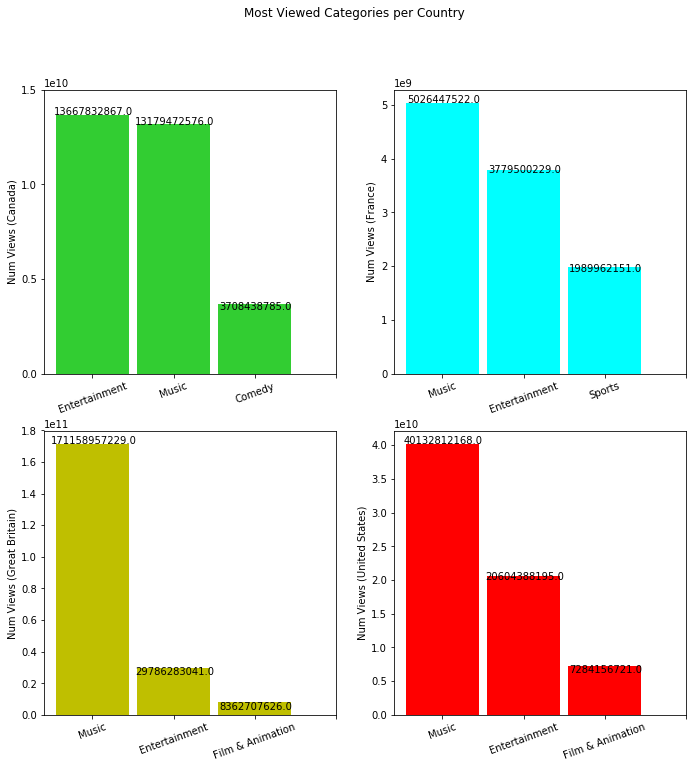

In [27]:
#what is the most viewed category (bar plot, one for each country with the plot being category vs. num views, and we can label it)
countryGroup = datadf.groupby(['Country','Category Name'])

catViews = countryGroup.agg({'Num Views':'sum'})
catViews = catViews['Num Views'].groupby(level=0, group_keys=False)
caCat = []
caViews = []
frCat = []
frViews = []
gbCat = []
gbViews = []
usCat = []
usViews = []
for country, newdf in catViews:
    countrydf = newdf.nlargest()[:3]
    countrydf = countrydf.reset_index()
    if country=='CA':
        for views in countrydf['Num Views']:
            caViews.append(views)
        for cat in countrydf['Category Name']:
            caCat.append(cat)
    if country == 'FR':
        for views in countrydf['Num Views']:
            frViews.append(views)
        for cat in countrydf['Category Name']:
            frCat.append(cat)
    if country == 'GB':
        for views in countrydf['Num Views']:
            gbViews.append(views)
        for cat in countrydf['Category Name']:
            gbCat.append(cat)
    if country == 'US':
        for views in countrydf['Num Views']:
            usViews.append(views)
        for cat in countrydf['Category Name']:
            usCat.append(cat)

print(usViews)
print(usCat)
xaxis = np.arange(3)
fig, axes = plt.subplots(2,2,figsize=[11.5,11.5])
#0,0 is canada
#0,1 is France
#1,0 is GB
#1,1 is US
axes[0,0].bar(xaxis,caViews,color='g',width=-0.9)
axes[0,1].bar(xaxis,frViews,color='b',width=-0.9)
axes[1,0].bar(xaxis,gbViews,color='r',width=-0.9)
axes[1,1].bar(xaxis,usViews,color='y',width=-0.9)
colors = ['limegreen','cyan','r','y']
#fontcolors = ['black','white','black','black']
views = [caViews,frViews,usViews,gbViews]
print(views)
def autolabel(views):
    idxNum1 = 0
    idxNum2 = 0
    colorNum = 0
    for countryarray in views:
        labelcount=0
        bars = axes[idxNum1,idxNum2].bar(xaxis,countryarray,color=colors[colorNum],width=-0.9)
        for eachbar in bars:
            height = eachbar.get_height()
            axes[idxNum1,idxNum2].text(eachbar.get_x() + eachbar.get_width()/2.05, 1.03*height,
                   countryarray[labelcount],
                    ha='center',va='top',
                   color='black', fontname='Helvetica')
            labelcount+=1
        colorNum+=1
        #0,0
        if idxNum1==0 and idxNum2==0:
            idxNum2+=1
        #0,1
        elif idxNum1==0 and idxNum2==1:
            idxNum1+=1
        #1,1
        elif idxNum1==1 and idxNum2==1:
            idxNum2-=1
        #1,0
        
# Call functions to implement the function calls
autolabel(views)

axes[0,0].set_yticks(np.arange(1,2e10,5e9))
axes[0,0].set_xticks(np.arange(0,4,1))
axes[0,1].set_xticks(np.arange(0,4,1))
axes[1,0].set_xticks(np.arange(0,4,1))
axes[1,1].set_xticks(np.arange(0,4,1))

axes[0,0].set_ylabel('Num Views (Canada)')
axes[0,1].set_ylabel('Num Views (France)')
axes[1,0].set_ylabel('Num Views (Great Britain)')
axes[1,1].set_ylabel('Num Views (United States)')

axes[0,0].set_xticklabels(caCat,rotation=20)
axes[0,1].set_xticklabels(frCat,rotation=20)
axes[1,0].set_xticklabels(gbCat,rotation=20)
axes[1,1].set_xticklabels(usCat,rotation=20)
fig.suptitle('Most Viewed Categories per Country')
fig.show()
fig.savefig('MostViewedCat.png')

['Childish Gambino - This Is America (Official Video)', 'Ariana Grande - No Tears Left To Cry', "BTS (방탄소년단) 'FAKE LOVE' Official MV"]
['Music', 'Music', 'Music']
[3758488765.0, 1529291326.0, 1283188291.0]
[[631428335.0, 577553186.0, 411775069.0], [254277636.0, 167542474.0, 153765066.0], [8201898179.0, 6891280759.0, 6101309613.0], [3758488765.0, 1529291326.0, 1283188291.0]]


C:\Users\snigd\Anaconda3\lib\site-packages\matplotlib\figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "
C:\Users\snigd\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1331: UserWarning: findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


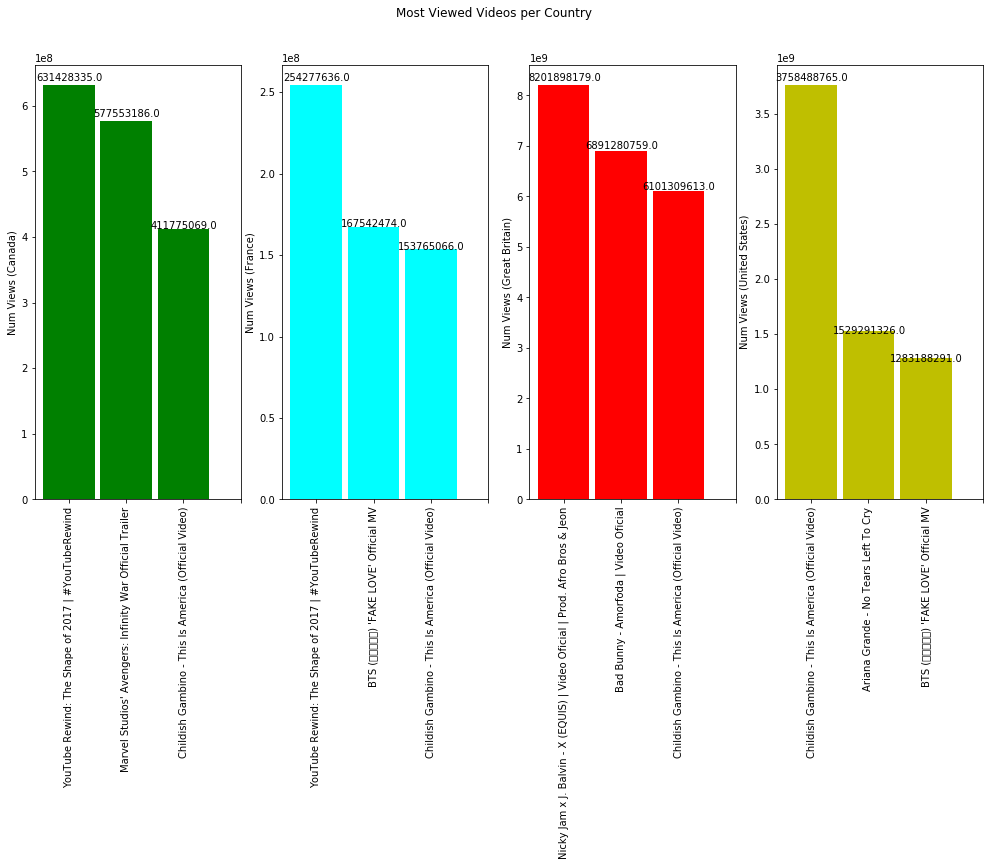

In [24]:
#most viewed videos for each country (Same thing as above, label with video and views and category)
videoGroup = datadf.groupby(['Country','Title','Category Name']).agg({'Num Views':'sum'})
videoGroup = videoGroup['Num Views'].groupby(level=0, group_keys=False)
caCat = []
caVids = []
caViews = []
frCat = []
frVids = []
frViews = []
gbCat = []
gbVids = []
gbViews = []
usCat = []
usVids = []
usViews = []
for country, newdf in videoGroup:
    countrydf = newdf.nlargest()[:3]
    countrydf = countrydf.reset_index()
    if country=='CA':
        for views in countrydf['Num Views']:
            caViews.append(views)
        for cat in countrydf['Category Name']:
            caCat.append(cat)
        for vid in countrydf['Title']:
            caVids.append(vid)
    if country == 'FR':
        for views in countrydf['Num Views']:
            frViews.append(views)
        for cat in countrydf['Category Name']:
            frCat.append(cat)
        for vid in countrydf['Title']:
            frVids.append(vid)
    if country == 'GB':
        for views in countrydf['Num Views']:
            gbViews.append(views)
        for cat in countrydf['Category Name']:
            gbCat.append(cat)
        for vid in countrydf['Title']:
            gbVids.append(vid)
    if country == 'US':
        for views in countrydf['Num Views']:
            usViews.append(views)
        for cat in countrydf['Category Name']:
            usCat.append(cat)
        for vid in countrydf['Title']:
            usVids.append(vid)
print(usVids)
print(usCat)
print(usViews)
fig, axes = plt.subplots(1,4,figsize=[17,8])
#0 is canada
#1 is France
#2 is GB
#3 is US
colors = ['g','cyan','r','y']
#fontcolors = ['black','white','black','black']
views = [caViews,frViews,gbViews,usViews]
print(views)
def autolabel(views):
    idxNum = 0
    for countryarray in views:
        labelcount=0
        bars = axes[idxNum].bar(xaxis,countryarray,color=colors[idxNum],width=-0.9)
        for eachbar in bars:
            height = eachbar.get_height()
            axes[idxNum].text(eachbar.get_x() + eachbar.get_width()/2.05, 1.03*height,
                   countryarray[labelcount],
                    ha='center',va='top',
                   color='black', fontname='Helvetica')
            labelcount+=1
        idxNum+=1
# Call functions to implement the function calls
autolabel(views)

axes[0].set_xticks(np.arange(0,4,1))
axes[1].set_xticks(np.arange(0,4,1))
axes[2].set_xticks(np.arange(0,4,1))
axes[3].set_xticks(np.arange(0,4,1))

axes[0].set_ylabel('Num Views (Canada)')
axes[1].set_ylabel('Num Views (France)')
axes[2].set_ylabel('Num Views (Great Britain)')
axes[3].set_ylabel('Num Views (United States)')

axes[0].set_xticklabels(caVids,rotation=90)
axes[1].set_xticklabels(frVids,rotation=90)
axes[2].set_xticklabels(gbVids,rotation=90)
axes[3].set_xticklabels(usVids,rotation=90)



fig.suptitle('Most Viewed Videos per Country')
fig.show()
fig.savefig('MostViewedVids.png')

In [28]:
#what is the most liked/disliked category (same things as above, one plot for liked and one for disliked)
likes = countryGroup.agg({'Num Likes':'sum'})
likes = likes['Num Likes'].groupby(level=0, group_keys=False)
dislikes = countryGroup.agg({'Num Dislikes':'sum'})
dislikes = dislikes['Num Dislikes'].groupby(level=0, group_keys=False)

likeCountry = []
likeNum = []
likeCat = []
for country, newdf in likes:
    countrydf = newdf.nlargest()[:3]
    countrydf = countrydf.reset_index()
    #print(countrydf)
    if country=='CA':
        for likes in countrydf['Num Likes']:
            likeNum.append(likes)
        for cat in countrydf['Category Name']:
            likeCat.append(cat)
            likeCountry.append(country)
    if country=='FR':
        for likes in countrydf['Num Likes']:
            likeNum.append(likes)
        for cat in countrydf['Category Name']:
            likeCat.append(cat)
            likeCountry.append(country)
    if country=='GB':
        for likes in countrydf['Num Likes']:
            likeNum.append(likes)
        for cat in countrydf['Category Name']:
            likeCat.append(cat)
            likeCountry.append(country)
    if country=='US':
        for likes in countrydf['Num Likes']:
            likeNum.append(likes)
        for cat in countrydf['Category Name']:
            likeCat.append(cat)
            likeCountry.append(country)

dislikeCountry = []
dislikeNum = []
dislikeCat = []

for country, newdf in dislikes:
    countrydf = newdf.nlargest()[:3]
    countrydf = countrydf.reset_index()
    if country=='CA':
        for dislikes in countrydf['Num Dislikes']:
            dislikeNum.append(likes)
        for cat in countrydf['Category Name']:
            dislikeCat.append(cat)
            dislikeCountry.append(country)
    if country=='FR':
        for dislikes in countrydf['Num Dislikes']:
            dislikeNum.append(likes)
        for cat in countrydf['Category Name']:
            dislikeCat.append(cat)
            dislikeCountry.append(country)
    if country=='GB':
        for dislikes in countrydf['Num Dislikes']:
            dislikeNum.append(likes)
        for cat in countrydf['Category Name']:
            dislikeCat.append(cat)
            dislikeCountry.append(country)
    if country=='US':
        for dislikes in countrydf['Num Dislikes']:
            dislikeNum.append(likes)
        for cat in countrydf['Category Name']:
            dislikeCat.append(cat)
            dislikeCountry.append(country)

#for country, newdf in dislikes:
#    countrydf = newdf.nlargest()[:3]
#    countrydf = countrydf.reset_index()
#    dislikeCountry.append(country)
#    dislikeNum.append(countrydf['Num Dislikes'][0])
#    dislikeCat.append(countrydf['Category Name'][0])
#print(likeNum)
#print(likeCountry)
#print(likeCat)
#print(dislikeCat)

likesdf = pd.DataFrame({
    'Country':likeCountry,
    'Num Likes':likeNum,
    'Category':likeCat
})
likesdf
likesdf.to_csv('MostLikedCats.csv')

dislikesdf = pd.DataFrame({
    'Country':dislikeCountry,
    'Num Likes':dislikeNum,
    'Category':dislikeCat
})
dislikesdf
dislikesdf.to_csv('MostDislikedCats.csv')

In [11]:
#THIS BOX IS USELESS IF WE'RE NOT RUNNING THE NEXT ONE
#most common tags totally, not by country (Top 10 tags, and number of uses)
taglist = datadf['Tags']
sepTags = []
templist=[]
for tag in taglist:
    if isinstance(tag,str):
        toappend = tag.split('|')
        templist.append(toappend)
    #print(len(templist))
cleaned = []
for entry in templist:
    #if only one tag, you don't want to split the characters in the next step so append it now
    if len(entry)==1:
        cleaned.append(entry[0].strip('"'))
    for word in entry:
        #make sure it's not just a meaningless letter or a one-word entry that has been split to chars
        if len(word) > 1:
            cleaned.append(word.strip('"'))
cleaned

['Eminem',
 'Walk',
 'On',
 'Water',
 'Aftermath/Shady/Interscope',
 'Rap',
 'plush',
 'bad unboxing',
 'unboxing',
 'fan mail',
 'idubbbztv',
 'idubbbztv2',
 'things',
 'best',
 'packages',
 'plushies',
 'chontent chop',
 'racist superman',
 'rudy',
 'mancuso',
 'king',
 'bach',
 'racist',
 'superman',
 'love',
 'rudy mancuso poo bear black white official music video',
 'iphone x by pineapple',
 'lelepons',
 'hannahstocking',
 'rudymancuso',
 'inanna',
 'anwar',
 'sarkis',
 'shots',
 'shotsstudios',
 'alesso',
 'anitta',
 'brazil',
 "Getting My Driver's License ",
 ' Lele Pons',
 'ryan',
 'higa',
 'higatv',
 'nigahiga',
 'i dare you',
 'idy',
 'rhpc',
 'dares',
 'no truth',
 'comments',
 'comedy',
 'funny',
 'stupid',
 'fail',
 'edsheeran',
 'ed sheeran',
 'acoustic',
 'live',
 'cover',
 'official',
 'remix',
 'official video',
 'lyrics',
 'session',
 '#DramaAlert',
 'Drama',
 'Alert',
 'DramaAlert',
 'keemstar',
 'youtube news',
 'jake paul',
 'team 10',
 'alissa violet',
 'cheated',

In [12]:
#THIS BOX RUNS FOREVER BECAUSE TAG LIST IS V LONG, MAYBE TRY A DIFF METHOD? OTHERWISE NOT DOING THIS PART
#uniquetags = []
#uniquetags.append(cleaned[0])
#match = False
#for tag in cleaned:
#    for unique in uniquetags:
#        if tag==unique:
#            match = True
#            break
#    if match==True:
#        match = False
#        continue
#    else:
#        uniquetags.append(tag)
#uniquetags

                       Comment Count
Category Name                       
Autos & Vehicles         1617.563063
Comedy                   5077.232147
Education                2792.572941
Entertainment            6173.731007
Film & Animation         5077.721742
Gaming                   6216.750555
Howto & Style            3888.921758
Movies                    908.588235
Music                   17782.714296
News & Politics          2287.010755
Nonprofits & Activism   52396.182090
People & Blogs           4035.977444
Pets & Animals           2949.772330
Science & Technology     5363.940320
Shows                     993.996667
Sports                   2987.077698
Travel & Events          1725.999009


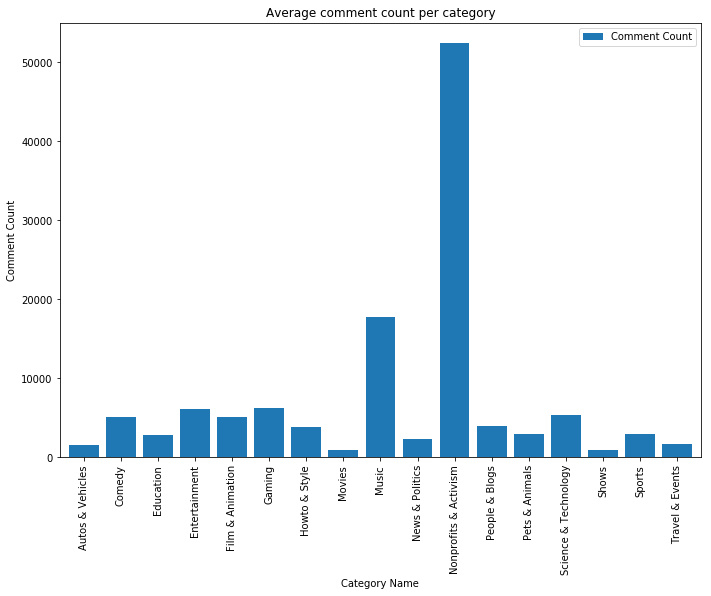

<Figure size 432x288 with 0 Axes>

In [48]:
#Average comment count for each category (bar plot)
catGroup = datadf.groupby(['Category Name']).agg({'Comment Count':'mean'})
catGroup = catGroup.dropna(axis=0, how = 'any')
catGroup = catGroup.drop(['Trailers'])
print(catGroup)

catGroup.plot(kind='bar', figsize=[11.5,8], width = 0.8)

plt.ylabel('Comment Count')
plt.title('Average comment count per category')
plt.show()
plt.savefig('AvgCommentCt.png')

['ChildishGambinoVEVO', 'ibighit', 'Dude Perfect', 'Marvel Entertainment', 'ArianaGrandeVevo']
[3758488765.0, 2235906679.0, 1870085178.0, 1806126076.0, 1576959172.0]


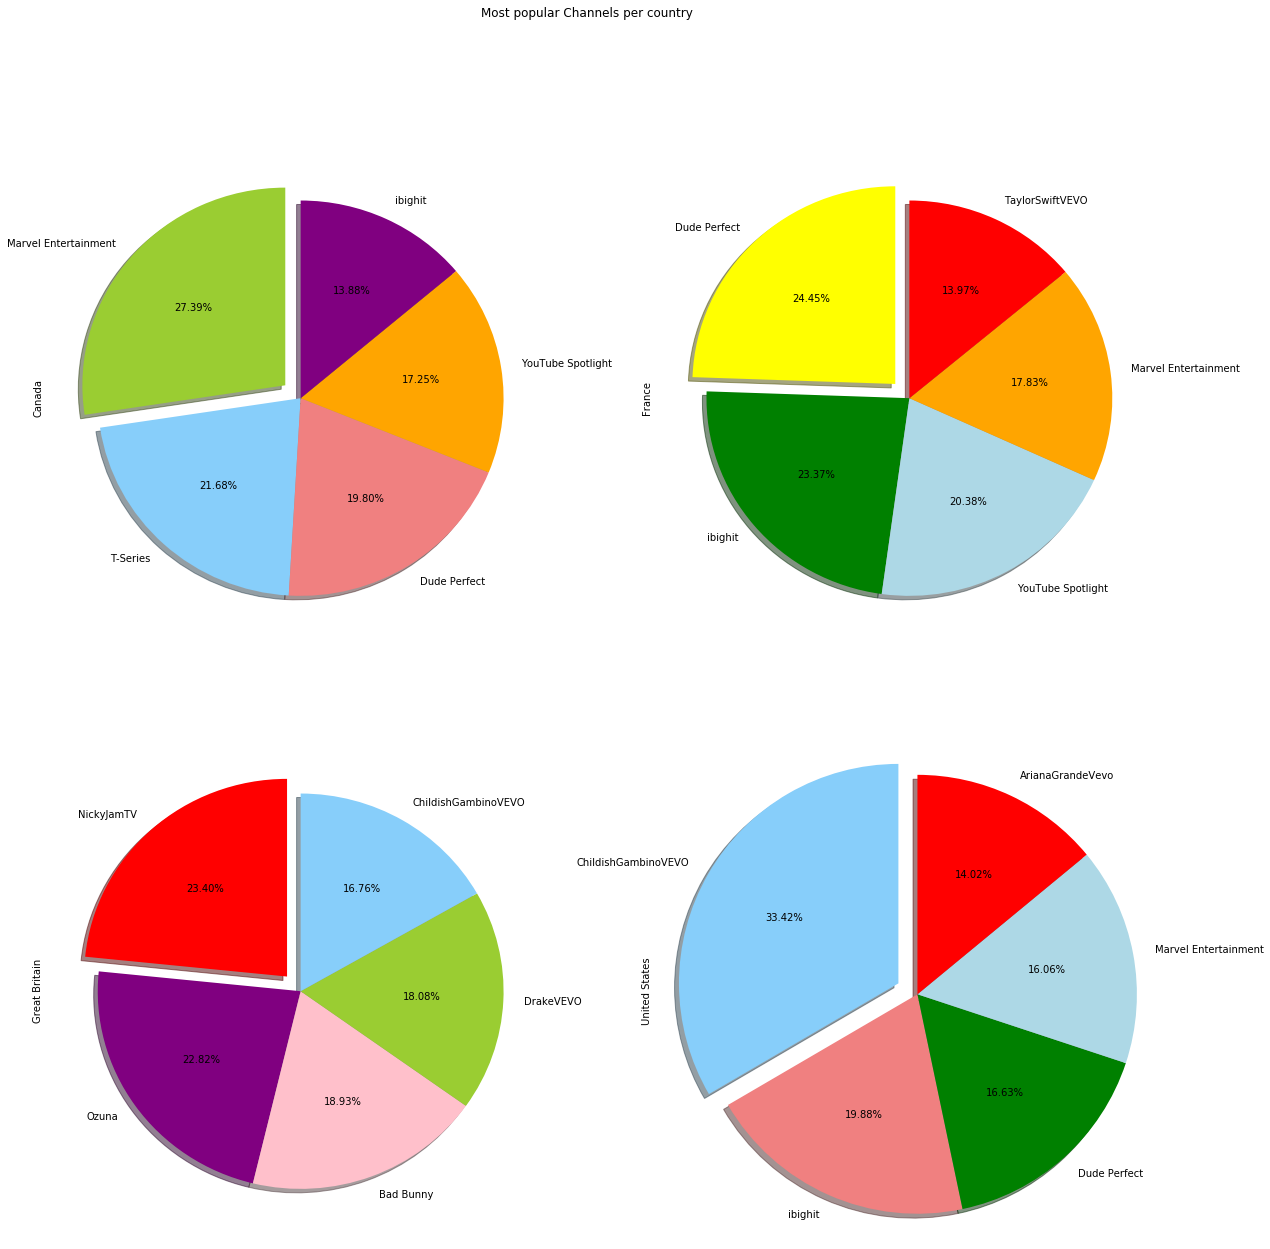

In [52]:
#5 most popular channels in each country (Pie chart, one for each country, separate based on channels' views, label the slices)
channelpop = datadf.groupby(['Country','Channel Title','Category Name']).agg({'Num Views':'sum'})
channelpop = channelpop['Num Views'].groupby(level=0, group_keys=False)
canChanns = []
canViews = []
fraChanns = []
fraViews = []
gbChanns = []
gbViews = []
usChanns = []
usViews = []

for country, newdf in channelpop:
    countrydf = newdf.nlargest()[:5]
    countrydf = countrydf.reset_index()
    if country=='CA':
        for views in countrydf['Num Views']:
            canViews.append(views)
        for chann in countrydf['Channel Title']:
            canChanns.append(chann)
    if country == 'FR':
        for views in countrydf['Num Views']:
            fraViews.append(views)
        for chann in countrydf['Channel Title']:
            fraChanns.append(chann)
    if country == 'GB':
        for views in countrydf['Num Views']:
            gbViews.append(views)
        for chann in countrydf['Channel Title']:
            gbChanns.append(chann)
    if country == 'US':
        for views in countrydf['Num Views']:
            usViews.append(views)
        for chann in countrydf['Channel Title']:
            usChanns.append(chann)
print(usChanns)
print(usViews)

fig,ax = plt.subplots(2,2,figsize=[20,20])
#0,0 - ca
#0,1 - fr
#1,0 - gb
#1,1 - us
explode = [0.1,0,0,0,0]
colors = ["yellowgreen","lightskyblue","lightcoral","orange","purple"]
colors2 = ["yellow","green","lightblue","orange","red"]
colors3 = ["red","purple","pink","yellowgreen","lightskyblue"]
colors4 = ["lightskyblue","lightcoral","green","lightblue","red"]
ax[0,0].pie(canViews, labels=canChanns,explode=explode,colors=colors,
           shadow=True,startangle=90, autopct = '%.2f%%')
ax[0,1].pie(fraViews, labels=fraChanns,explode=explode,colors=colors2,
           shadow=True,startangle=90, autopct = '%.2f%%')
ax[1,0].pie(gbViews, labels=gbChanns,explode=explode,colors=colors3,
           shadow=True,startangle=90, autopct = '%.2f%%')
ax[1,1].pie(usViews, labels=usChanns,explode=explode,colors=colors4,
           shadow=True,startangle=90, autopct = '%.2f%%')
plt.axis("equal")

ax[0,0].set_ylabel('Canada')
ax[0,1].set_ylabel('France')
ax[1,0].set_ylabel('Great Britain')
ax[1,1].set_ylabel('United States')


fig.suptitle('Most popular Channels per country')
fig.savefig('MostpopChannels.png')

In [53]:
#number of videos per category for each country (table/dataframe)
#FIND A WAY TO DELETE THE 2 LEVEL INDEX (VIDEO ID) FROM THE DATAFRAME SO IT'S NEAT
catGroup = datadf.groupby(['Country','Category Name']).agg({'Video ID':'nunique'})
catGroup = catGroup.unstack()
catGroup = catGroup.dropna(axis=1,how='any')
catGroup.to_csv('NumVidsPerCat.csv')
#IT IS SAVING WEIRDLY FIX THIS

['WE MADE OUR MOM CRY....', 'Charlie Puth - BOY [...', 'Mission: Impossible ...', 'Rooster Teeth Animat...', 'Sam Smith - Pray (Of...']
[30, 29, 29, 29, 29]


C:\Users\snigd\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1331: UserWarning: findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


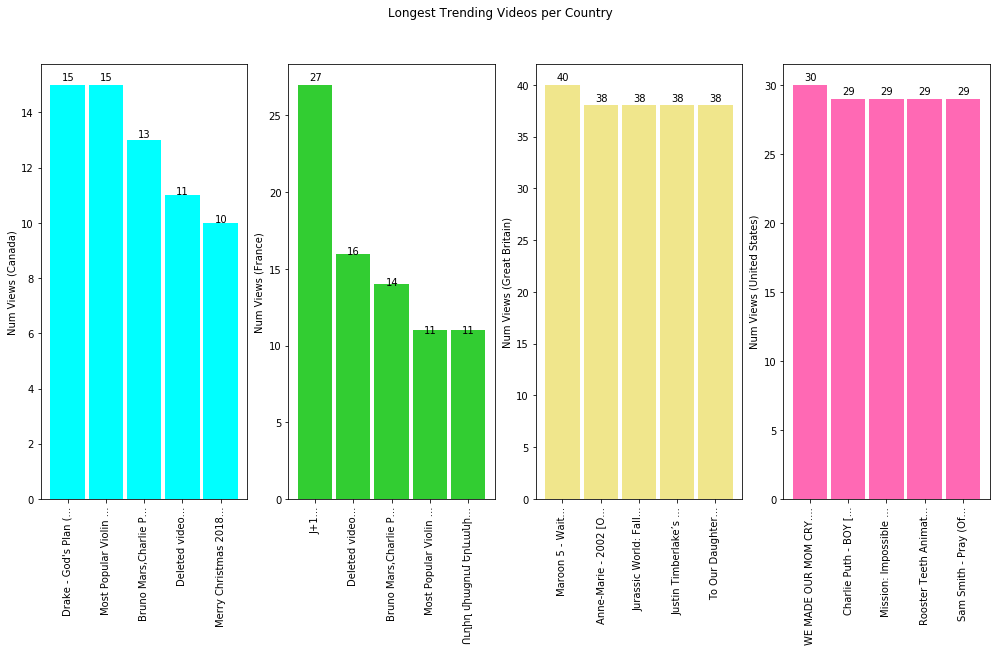

In [60]:
#Longest trending videos in each country
trendingGroup = datadf.groupby(['Country','Title']).agg({'Date Trending':'count'})
trendingGroup = trendingGroup['Date Trending'].groupby(level=0, group_keys=False)
caVids = []
caDays = []
frVids = []
frDays = []
gbVids = []
gbDays = []
usVids = []
usDays = []
#print(trendingGroup.nlargest(5))
for country, group in trendingGroup:
    group = group.nlargest(5)
    group = group.reset_index()
    if country=='CA':
        for vids in group['Title']:
            caVids.append(vids)
        for num in group['Date Trending']:
            caDays.append(num)
    if country == 'FR':
        for vids in group['Title']:
            frVids.append(vids)
        for num in group['Date Trending']:
            frDays.append(num)
    if country == 'GB':
        for vids in group['Title']:
            gbVids.append(vids)
        for num in group['Date Trending']:
            gbDays.append(num)
    if country == 'US':
        for vids in group['Title']:
            usVids.append(vids)
        for num in group['Date Trending']:
            usDays.append(num)

vids = [caVids,frVids,gbVids,usVids]
for index,each in enumerate(vids):
    for idx,videoname in enumerate(each):
        newname = videoname[:20] + '...'
        vids[index][idx]=newname

print(usVids)
print(usDays)

xaxis=np.arange(5)
fig, axes = plt.subplots(1,4,figsize=[17,8])
#0 is canada
#1 is France
#2 is GB
#3 is US

colors = ['cyan','limegreen','khaki','hotpink']
#fontcolors = ['black','white','black','black']
days = [caDays,frDays,gbDays,usDays]
def autolabel(days):
    idxNum = 0
    for countryarray in days:
        labelcount=0
        bars = axes[idxNum].bar(xaxis,countryarray,color=colors[idxNum],width=-0.9)
        for eachbar in bars:
            height = eachbar.get_height()
            axes[idxNum].text(eachbar.get_x() + eachbar.get_width()/2.05, 1.03*height,
                   countryarray[labelcount],
                    ha='center',va='top',
                   color='black', fontname='Helvetica')
            labelcount+=1
        idxNum+=1
# Call functions to implement the function calls
autolabel(days)

axes[0].set_xticks(np.arange(0,5,1))
axes[1].set_xticks(np.arange(0,5,1))
axes[2].set_xticks(np.arange(0,5,1))
axes[3].set_xticks(np.arange(0,5,1))

axes[0].set_ylabel('Num Views (Canada)')
axes[1].set_ylabel('Num Views (France)')
axes[2].set_ylabel('Num Views (Great Britain)')
axes[3].set_ylabel('Num Views (United States)')

axes[0].set_xticklabels(caVids,rotation=90)
axes[1].set_xticklabels(frVids,rotation=90)
axes[2].set_xticklabels(gbVids,rotation=90)
axes[3].set_xticklabels(usVids,rotation=90)
fig.suptitle('Longest Trending Videos per Country')
fig.savefig('LongestTrendingVids.png')